In [5]:
from matplotlib import pyplot as plt

In [6]:
import os 
import glob 
from tensorflow.python.summary.summary_iterator import summary_iterator

def get_section_results(logdir, tag="Eval_AverageReturn"):
    logdir = os.path.join(logdir, "./event*")
    eventfile = glob.glob(logdir)[0]
    X = []
    Y = []
    for e in summary_iterator(eventfile):
        for v in e.summary.value:
            if v.tag == 'Train_EnvstepsSoFar':
                X.append(v.simple_value)
            elif v.tag == tag:
                Y.append(v.simple_value)
    return X, Y

# X, Y = get_section_results(".")
# for i, (x, y) in enumerate(zip(X, Y)):
#     print('Iteration {:d} | Train steps: {:d} | Return: {}'.format(i, int(x), y))

In [16]:
# copy outputs into ./data
import shutil
def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

dest_dir = os.path.abspath("./data")

for f in glob.glob("./outputs/*/*/data/"):
    copytree(f, dest_dir)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


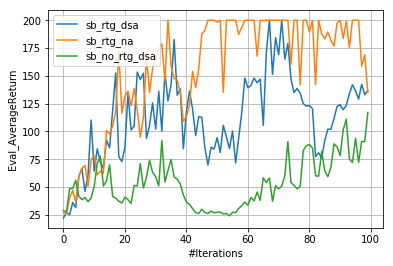

In [8]:
# problem 1-1
_, sb_rtg_dsa = get_section_results("./outputs/2022-03-11/15-43-04/data/hw3_q1_sb_rtg_dsa_CartPole-v0_11-03-2022_15-43-04")
_, sb_rtg_na = get_section_results("./outputs/2022-03-11/15-45-48/data/hw3_q1_sb_rtg_na_CartPole-v0_11-03-2022_15-45-48")
_, sb_no_rtg_dsa = get_section_results("./outputs/2022-03-14/14-17-13/data/hw3_q1_sb_no_rtg_dsa_CartPole-v0_14-03-2022_14-17-14")

plt.plot(sb_rtg_dsa, label='sb_rtg_dsa')
plt.plot(sb_rtg_na, label='sb_rtg_na')
plt.plot(sb_no_rtg_dsa, label='sb_no_rtg_dsa')

plt.legend()
plt.grid(True)
plt.xlabel("#Iterations")
plt.ylabel("Eval_AverageReturn")
plt.show()

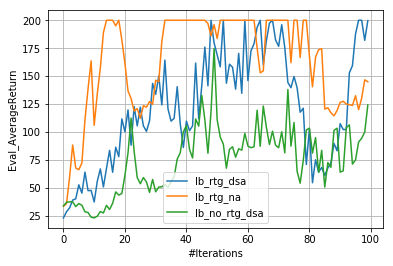

In [9]:
# problem 1-2
_, lb_rtg_dsa = get_section_results("./outputs/2022-03-11/15-49-02/data/hw3_q1_lb_rtg_dsa_CartPole-v0_11-03-2022_15-49-02")
_, lb_rtg_na = get_section_results("./outputs/2022-03-14/14-27-44/data/hw3_q1_lb_rtg_na_CartPole-v0_14-03-2022_14-27-45")
_, lb_no_rtg_dsa = get_section_results("./outputs/2022-03-14/14-19-37/data/hw3_q1_lb_no_rtg_dsa_CartPole-v0_14-03-2022_14-19-38")

plt.plot(lb_rtg_dsa, label='lb_rtg_dsa')
plt.plot(lb_rtg_na, label='lb_rtg_na')
plt.plot(lb_no_rtg_dsa, label='lb_no_rtg_dsa')

plt.legend()
plt.grid(True)
plt.xlabel("#Iterations")
plt.ylabel("Eval_AverageReturn")
plt.show()

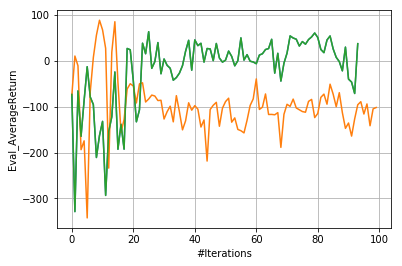

In [13]:
# problem 3
_, p1 = get_section_results("./outputs/" + "2022-03-12/12-44-12/data/hw3_q3_b40000_r0.005_LunarLanderContinuous-v2_12-03-2022_12-44-12", tag="Eval_MaxReturn")
_, p2 = get_section_results("./outputs/" + "2022-03-12/15-48-12/data/hw3_q3_b100000_r0.003_LunarLanderContinuous-v2_12-03-2022_15-48-12", tag="Eval_MaxReturn")
_, p3 = get_section_results("./outputs/" + "2022-03-12/12-44-12/data/hw3_q3_b40000_r0.005_LunarLanderContinuous-v2_12-03-2022_12-44-12", tag="Eval_MaxReturn")

plt.plot(p1)
plt.plot(p2)
plt.plot(p3)

plt.grid(True)
plt.xlabel("#Iterations")
plt.ylabel("Eval_AverageReturn")
plt.show()

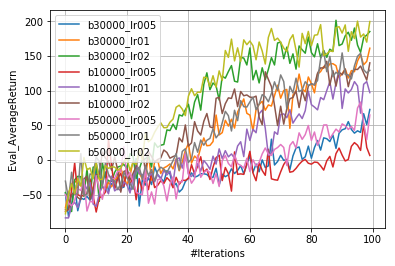

In [13]:
# problem 4-1
_, b30000_lr005 = get_section_results("./outputs/" + "2022-03-13/01-28-13/data/hw3_q4_search_b30000_lr0.005_rtg_nnbaseline_HalfCheetah-v2_13-03-2022_01-28-13", tag="Eval_MaxReturn")
_, b30000_lr01 = get_section_results("./outputs/" + "2022-03-13/03-22-51/data/hw3_q4_search_b30000_lr0.01_rtg_nnbaseline_HalfCheetah-v2_13-03-2022_03-22-51", tag="Eval_MaxReturn")
_, b30000_lr02 = get_section_results("./outputs/" + "2022-03-13/04-21-16/data/hw3_q4_search_b30000_lr0.02_rtg_nnbaseline_HalfCheetah-v2_13-03-2022_04-21-16", tag="Eval_MaxReturn")
_, b10000_lr005 = get_section_results("./outputs/" + "2022-03-13/05-11-41/data/hw3_q4_search_b10000_lr0.005_rtg_nnbaseline_HalfCheetah-v2_13-03-2022_05-11-41", tag="Eval_MaxReturn")
_, b10000_lr01 = get_section_results("./outputs/" + "2022-03-13/05-32-46/data/hw3_q4_search_b10000_lr0.01_rtg_nnbaseline_HalfCheetah-v2_13-03-2022_05-32-46", tag="Eval_MaxReturn")
_, b10000_lr02 = get_section_results("./outputs/" + "2022-03-13/05-53-42/data/hw3_q4_search_b10000_lr0.02_rtg_nnbaseline_HalfCheetah-v2_13-03-2022_05-53-42", tag="Eval_MaxReturn")
_, b50000_lr005 = get_section_results("./outputs/" + "2022-03-13/06-14-45/data/hw3_q4_search_b50000_lr0.005_rtg_nnbaseline_HalfCheetah-v2_13-03-2022_06-14-45", tag="Eval_MaxReturn")
_, b50000_lr01 = get_section_results("./outputs/" + "2022-03-13/07-52-42/data/hw3_q4_search_b50000_lr0.01_rtg_nnbaseline_HalfCheetah-v2_13-03-2022_07-52-42", tag="Eval_MaxReturn")
_, b50000_lr02 = get_section_results("./outputs/" + "2022-03-13/09-30-57/data/hw3_q4_search_b50000_lr0.02_rtg_nnbaseline_HalfCheetah-v2_13-03-2022_09-30-57", tag="Eval_MaxReturn")

plt.plot(b30000_lr005, label='b30000_lr005')
plt.plot(b30000_lr01, label='b30000_lr01')
plt.plot(b30000_lr02, label='b30000_lr02')
plt.plot(b10000_lr005, label='b10000_lr005')
plt.plot(b10000_lr01, label='b10000_lr01')
plt.plot(b10000_lr02, label='b10000_lr02')
plt.plot(b50000_lr005, label='b50000_lr005')
plt.plot(b50000_lr01, label='b50000_lr01')
plt.plot(b50000_lr02, label='b50000_lr02')


plt.legend()
plt.grid(True)
plt.xlabel("#Iterations")
plt.ylabel("Eval_AverageReturn")
plt.show()

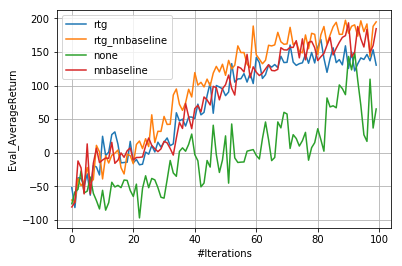

In [14]:
# problem 4-2
_, rtg = get_section_results("./outputs/" + "2022-03-13/22-47-39/data/hw3_q4_b50000_lr0.02_rtg_HalfCheetah-v2_13-03-2022_22-47-39", tag="Eval_MaxReturn")
_, rtg_nnbaseline = get_section_results("./outputs/" + "2022-03-14/00-26-28/data/hw3_q4_b50000_lr0.02_rtg_nnbaseline_HalfCheetah-v2_14-03-2022_00-26-28", tag="Eval_MaxReturn")
_, none = get_section_results("./outputs/" + "2022-03-14/12-44-13/data/hw3_q4_b50000_lr0.02_HalfCheetah-v2_14-03-2022_12-44-13", tag="Eval_MaxReturn")
_, nnbaseline = get_section_results("./outputs/" + "2022-03-14/13-54-35/data/hw3_q4_b50000_lr0.02_nnbaseline_HalfCheetah-v2_14-03-2022_13-54-35", tag="Eval_MaxReturn")

plt.plot(rtg, label='rtg')
plt.plot(rtg_nnbaseline, label='rtg_nnbaseline')
plt.plot(none, label='none')
plt.plot(nnbaseline, label='nnbaseline')



plt.legend()
plt.grid(True)
plt.xlabel("#Iterations")
plt.ylabel("Eval_AverageReturn")
plt.show()

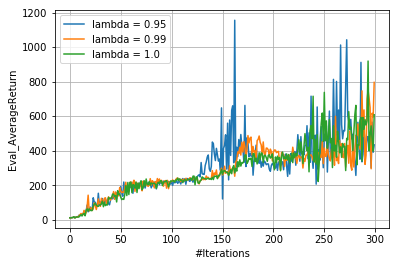

In [16]:
# problem 5
_, lambda95 = get_section_results("./outputs/" + "2022-03-13/21-05-28/data/hw3_q5_b2000_r0.001_lambda0.95_Hopper-v2_13-03-2022_21-05-29")
_, lambda99 = get_section_results("./outputs/" + "2022-03-13/21-17-24/data/hw3_q5_b2000_r0.001_lambda0.99_Hopper-v2_13-03-2022_21-17-24")
_, lambda1 = get_section_results("./outputs/" + "2022-03-13/21-29-09/data/hw3_q5_b2000_r0.001_lambda1.0_Hopper-v2_13-03-2022_21-29-09")

plt.plot(lambda95, label='lambda = 0.95')
plt.plot(lambda99, label='lambda = 0.99')
plt.plot(lambda1, label='lambda = 1.0')


plt.legend()
plt.grid(True)
plt.xlabel("#Iterations")
plt.ylabel("Eval_AverageReturn")
plt.show()

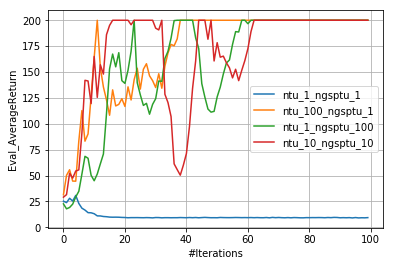

In [17]:
# problem 6
_, ntu_1_ngsptu_1 = get_section_results("./outputs/" + "2022-03-13/21-34-09/data/hw3_q6_ac_1_1_CartPole-v0_13-03-2022_21-34-09")
_, ntu_100_ngsptu_1 = get_section_results("./outputs/" + "2022-03-13/21-36-20/data/hw3_q6_ac_100_1_CartPole-v0_13-03-2022_21-36-20")
_, ntu_1_ngsptu_100 = get_section_results("./outputs/" + "2022-03-13/21-38-49/data/hw3_q6_ac_1_100_CartPole-v0_13-03-2022_21-38-49")
_, ntu_10_ngsptu_10 = get_section_results("./outputs/" + "2022-03-13/21-41-20/data/hw3_q6_ac_10_10_CartPole-v0_13-03-2022_21-41-20")

plt.plot(ntu_1_ngsptu_1, label='ntu_1_ngsptu_1')
plt.plot(ntu_100_ngsptu_1, label='ntu_100_ngsptu_1')
plt.plot(ntu_1_ngsptu_100, label='ntu_1_ngsptu_100')
plt.plot(ntu_10_ngsptu_10, label='ntu_10_ngsptu_10')


plt.legend()
plt.grid(True)
plt.xlabel("#Iterations")
plt.ylabel("Eval_AverageReturn")
plt.show()

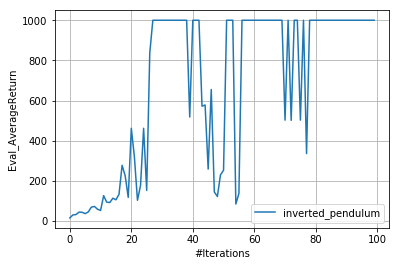

In [20]:
# problem 7-1
_, inverted_pendulum = get_section_results("./outputs/" + "2022-03-13/22-38-15/data/hw3_q7_10_10_InvertedPendulum-v2_13-03-2022_22-38-15")

plt.plot(inverted_pendulum, label='inverted_pendulum')

plt.legend()
plt.grid(True)
plt.xlabel("#Iterations")
plt.ylabel("Eval_AverageReturn")
plt.show()

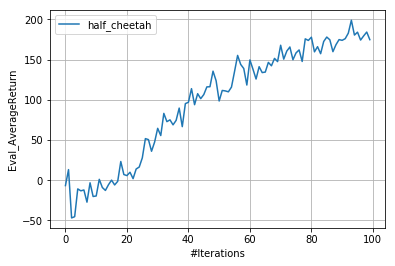

In [21]:
# problem 7-2
_, half_cheetah = get_section_results("./outputs/" + "2022-03-13/22-46-55/data/hw3_q7_10_10_HalfCheetah-v2_13-03-2022_22-46-55", tag="Eval_MaxReturn")

plt.plot(half_cheetah, label='half_cheetah')

plt.legend()
plt.grid(True)
plt.xlabel("#Iterations")
plt.ylabel("Eval_AverageReturn")
plt.show()

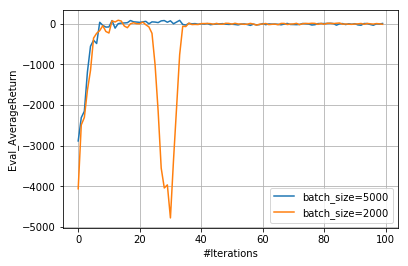

In [15]:
# problem 8
_, hc1 = get_section_results("./outputs/" + "2022-03-14/22-06-05/data/hw3_q8_cheetah_n500-arch1x32_cheetah-ift6163-v0_14-03-2022_22-06-05", tag="Eval_MaxReturn")
_, hc2 = get_section_results("./outputs/" + "2022-03-14/22-41-47/data/hw3_q8_cheetah_n500-arch1x32_cheetah-ift6163-v0_14-03-2022_22-41-47", tag="Eval_MaxReturn")

plt.plot(hc1, label='batch_size=5000')
plt.plot(hc2, label='batch_size=2000')

plt.legend()
plt.grid(True)
plt.xlabel("#Iterations")
plt.ylabel("Eval_AverageReturn")
plt.show()